In [2]:
#GOAL: Importing libraries needed to execute code

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
print("Imports complete")

Imports complete


In [20]:
#GOAL: Read in csv file and present it

new_castle = pd.read_csv('New_Castle.csv')
display(new_castle.head())

print("Task #1 complete")

Year  Street  Number of Entities  Number of Vacant         Type
0  1952   Acorn                   9                 0  Residential
1  1952   Adams                 110                 1        Mixed
2  1952   Addis                  23                 3  Residential
3  1952  Adella                   1                 0  Residential
4  1952   Agnew                  30                 0  Residential

Task #1 complete


In [32]:
#GOAL: Make sure the data is correctly formatted (i.e. no extraneous whitespace in values)

tidy2 = pd.read_csv('Tidy2 - Post - Changes in Number of Dwellings Per Street - Sheet1.csv')
new_castle = pd.read_csv('New_Castle.csv')

def length_of_values(df, columns):
    """
    Summary
    ----------
    Creates a DataFrame that stores the lengths of strings for each column in each row of df

    Parameters
    ----------
    data : DataFrame 
    columns : list
        the columns of df must contain only strings
        
    Returns
    -------
    DataFrame
        Each column will contain the lengths of the corresponding strings of that same column name
    """
    
    lengths_df = pd.DataFrame()
    
    rows = range(len(df.index))
    
    for column in columns:
        c = pd.Series()
        for row in rows:
            c = c.append(pd.Series([len(df.loc[row, column])]))
        lengths_df[column] = c
        
    lengths_df.reset_index(drop=True, inplace=True)
    
    return lengths_df
        

def remove_extraneous_whitespace(df, columns):
    """
    Summary
    ----------
    Removes any additional whitespace before, after, and between words in the selected columns of df

    Parameters
    ----------
    df : DataFrame 
    columns : list
        the columns of df must contain only strings
        
    Returns
    -------
    DataFrame
        new DataFrame which is the same except for the removal of the whitespace of the designated columns
    """
    
    rows = range(len(df.index))
    
    new_df = df.copy(deep=True)
    
    for column in columns:
        for row in rows:
            new_df.loc[row, column] = ' '.join(new_df.loc[row, column].split()) #modifies new_df inplace
    
    return new_df 

def is_extraneous_whitespace(df, column, name='', export=False): #only for one column
    """
    Summary
    ----------
    Checks whether selected column contains extraneous whitespace (i.e. whitespace that is before, after, and/or between words of the designated column)

    Parameters
    ----------
    df : DataFrame 
    columns : str
         a column name of df
    name : str
        name of df
    export : bool
        whether to export DataFrame that was created, in order to evaluate whether there was or was not extraneous whitespace
        
    Returns
    -------
    (bool, list)
        bool : True if extraneous whitespace was found
               False otherwise
        list : list of 2-tuples containing the index of the row where the extraneous whitespace was found and
                                           the column value name connected to that index
    """
    
    df_orig = df
    orig_length_of_values = length_of_values(df_orig, [column])
    
    df_clean = remove_extraneous_whitespace(df, [column])
    clean_length_of_values = length_of_values(df_clean, [column])
    
    column_diff_name = column + "_Diff" #new name of column
    
    length_of_values_diff = orig_length_of_values.subtract(clean_length_of_values)
    length_of_values_diff.rename(columns={column:column_diff_name}, inplace=True)
    
    df_length_of_values_diff = pd.DataFrame(df[column], columns={column}) #names of streets
    df_length_of_values_diff[column_diff_name] = length_of_values_diff[column_diff_name] #difference in street names
    #display(df_length_of_values_diff)
    
    extraneous_index=[] #continue
    not_extraneous=True
    for i in range(len(df.index)):
        if df_length_of_values_diff[column_diff_name][i] != 0: #if the length of the cleaned DataFrame changed, then the difference between the 2 DataFrame's string lengths would not be 0 
            extraneous_index.append((i, df_length_of_values_diff[column][i]))
            not_extraneous=False
                                                              
    if export:
        df_length_of_values_diff.to_csv(name + "_Length_Of_Values_Diff.csv", index=False)
    
    return (not not_extraneous, extraneous_index) #because if there are not extraneous whitespace the function returns False, and vice-versa

is_tidy2_dirty = is_extraneous_whitespace(tidy2,'Street', name='Tidy2', export=True)
is_new_castle_dirty = is_extraneous_whitespace(new_castle,'Street', name='New_Castle', export=True)
print("Is there extraneous whitespace for tidy2?", is_tidy2_dirty, sep = ' ')
print("Is there extraneous whitespace for new_castle?", is_new_castle_dirty, sep = ' ')

if is_new_castle_dirty[0]: #make it tidy!
    new_castle =  remove_extraneous_whitespace(new_castle, ['Street'])
    new_castle.to_csv("New_Castle.csv", index=False)
    print('New_Castle.csv updated!')
else:
    print('No need to update: New_Castle.csv is clean!')


print("Task #2 Complete")


Is there extraneous whitespace for tidy2? (True, [(31, 'Beckford '), (39, 'Big Run '), (62, 'Byers Av '), (84, 'Center Alley '), (187, 'Garfield Av '), (259, 'Lacock '), (351, 'North '), (579, 'Beckford '), (639, 'Centennial '), (777, 'Glendale '), (848, 'Lacock '), (877, 'Lutton '), (899, 'Martin '), (932, 'Milton Way '), (1010, 'Ranney Av '), (1157, 'Wilder ')])
Is there extraneous whitespace for new_castle? (False, [])
No need to update: New_Castle.csv is clean!
Task #2 Complete


Task #3 complete


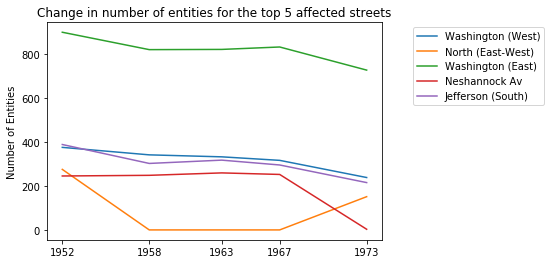

In [11]:
#GOAL: Plot change in entities and change in vancancies for Neshannock Avenue from 1952 to 1973

new_castle = pd.read_csv('New_Castle.csv')
new_castle_top_5 = pd.read_csv('New_Castle_Top_5.csv')

def my_lineplot(data, x, y, title):
    """
    Summary
    ----------
    Executes a lineplot with a title

    Parameters
    ----------
    data : DataFrame 
    x : str
        label for a column
    y : str
        label for a column
    title : str
        title of lineplot
    """
    
    plt.figure()
    plt.title(title)
    sns.lineplot(data=data, x=x, y=y)

#neshannock_av_entities = new_castle.iloc[[372,1022]]
#my_lineplot(data=neshannock_av_entities, x='Year', y='Number of Entities', title="Change in number of residents in Neshannock Av: 1952 -> 1973")

#Place this at the bottom of the code (so it makes sense chronologically)
plt.figure()
plt.title("Change in number of entities for the top 5 affected streets")
for street in list(set(new_castle_top_5['Street'])):
    new_castle_street = new_castle_top_5.loc[new_castle_top_5['Street'] == street]
    #lp = sns.lineplot(x=new_castle_street['Year'], y=new_castle_street['Number of Entities'], label=street) #original, didn't show the correct tick marks
    x = [1952,1958,1963,1967,1973]
    lp = sns.lineplot(x=x, y=new_castle_street['Number of Entities'], label=street)
    lp.set_xticks(x)
    lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
       

print("Task #3 complete")

Year  Number of Entities
0  1952               19038
1  1973               19899

Year  Number of Vacant
0  1952               584
1  1973              1120

Task #3 complete


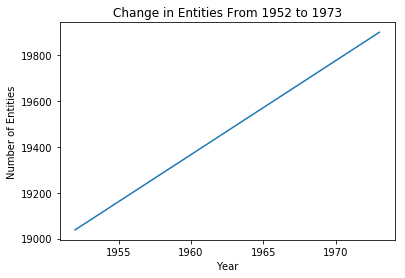

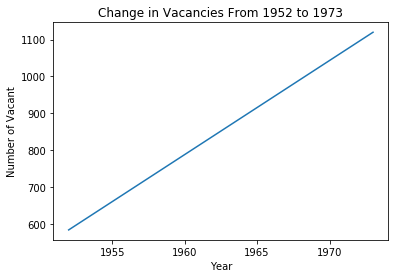

In [22]:
#GOAL: Show the average net change in entities and net change in vacancies from all streets between 1952 and 1973 (two years plotted)

new_castle = pd.read_csv('New_Castle.csv')
    
sumEntity = new_castle.groupby('Year').sum()['Number of Entities'].reset_index()
sumVacant = new_castle.groupby('Year').sum()['Number of Vacant'].reset_index()

display(sumEntity)
display(sumVacant)

my_lineplot(data=sumEntity, x='Year', y='Number of Entities', title="Change in Entities From 1952 to 1973")
my_lineplot(data=sumVacant, x='Year', y='Number of Vacant', title="Change in Vacancies From 1952 to 1973")

print("Task #4 complete")

In [23]:
#GOAL: Combine East and West streets

new_castle = pd.read_csv('New_Castle.csv')

def has_suffix(word, root, suffix_list):
    """
    Summary
    ----------
    Checks whether a string is equivalent to another string plus one of the suffixes in the suffix list

    Parameters
    ----------
    word : str
    root : str
    suffix_list : list
        list of strings

    Returns
    -------
    bool
    """
    
    for suffix in suffix_list:
        if word == root + suffix:
            return True
    return False
    

def combine_east_west_streets(df_to_truncate):
    """
    Summary
    ----------
    Truncates a DataFrame by combining streets that differ only by East, West cardinal directions
    
    Extended description
    ----------
    A new, empty DataFrame object is created with the following criteria when appending:
        If a street is divided into an East and West (specified by the appended '(East)' or '(West)' after the base part (i.e. everything but the cardinal direction (if it has one))):
            The 'Year' remains the same since the adjacent streets are of the same year
            The 'Street' will have the base part of the street name (Ex. 'Washington') and append ' (East-West)' as the cardinal direction
            The 'Number of Entities' and 'Number of Vacant' values of those rows are summed together
            The 'Type' of the new combined street will be based on the methodology of 'Type'
                Ex. A 'Residential' row + 'Non-Residential' row = 'Mixed' row
        If a street doesn't possess BOTH an East and West:
            The row is unmodified and appended to the new DataFrame object
            
    Note: Function assumes street names are in alphabetical order (Ex. Ace (East) -> Ace -> Ace (South) -> Ace (West) is not possible)
    
    Note: Function assumes streets that are paired East and West are from the same year 

    Parameters
    ----------
    df_to_truncate : DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str

    Returns
    -------
    Data Frame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types : int, str, int, int, str
    """
    
    new_castle_east_west_combined = pd.DataFrame()
    new_castle_size =df_to_truncate['Street'].size
    i = 0
    
    while i < new_castle_size:
        curr_row = df_to_truncate.iloc[i] #get current row

        year = curr_row['Year']
        streetName = curr_row['Street']
        numEntities = curr_row['Number of Entities']
        numVacancies = curr_row['Number of Vacant']
        residType = curr_row['Type']
        
        rows_between_east_west = pd.DataFrame() #rows between ('East') and ('West') streets (ex: Swansea Av)

        if ('(East)' in streetName) and (i+1 != new_castle_size): #2nd condition prevents going out of the range of the DataFrame
            streetName_short = streetName.split(' ')[:-1] 
            streetName_short = ' '.join(streetName_short) #Street name without cardinal direction (i.e. 'Ranney Av (East)' -> 'Ranney Av')
        
            i+=1 #Since now we will be looking at adjacent street
            next_row = df_to_truncate.iloc[i] 
            
            while has_suffix(next_row['Street'], streetName_short, suffix_list=[' (West)', ' (North)', ' (South)']): #Some streets might have East and West separated by another cardinal direction; Ex. Swansea Av (East) -> Swansea Av (South) -> Swansea Av (West)
                if next_row['Street'] == streetName_short + ' (West)':
                    numEntities += next_row['Number of Entities'] #sum up the entities and vacancies since the streets are being combined
                    numVacancies += next_row['Number of Vacant']

                    if residType == 'Mixed' or next_row['Type'] == 'Mixed': #rules for combined street if currently separate streets with same name have different resident types
                        residType = 'Mixed'
                    elif residType == 'Residential' and  next_row['Type'] == 'Non-Residential':
                        residType = 'Mixed'
                    elif residType == 'Non-Residential' and  next_row['Type'] == 'Residential':
                        residType = 'Mixed'
                    elif residType == 'NA':
                        residType = next_row['Type']
                    elif next_row['Type'] == 'NA':
                        pass #don't change residType then
                    
                    streetName = streetName_short + ' (East-West)' #since East-West is now combined
                    
                    break #NOTE: break will not execute the while's else statement
                else:
                    row_between_east_west = pd.DataFrame(data={'Year':[next_row['Year']], 'Street':[next_row['Street']],
                                                               'Number of Entities':[next_row['Number of Entities']],
                                                               'Number of Vacant':[next_row['Number of Vacant']], 'Type':[next_row['Type']]
                                                              })
                    rows_between_east_west = rows_between_east_west.append(row_between_east_west, ignore_index=True) #West street wasn't found (yet); need to store these streets so that they get appended to new DataFrame (after East-West or East street (if West street isn't found))
                    i+=1 #since we are going through another street in this nested while loop, i needs to keep up
                    next_row = df_to_truncate.iloc[i]
                
            else: 
                i-=1 #cancels out last i+=1 in nested while loop since 'next_row' got rejected (i.e. the East street couldn't find its corresponding West street)
                    
        east_west = pd.DataFrame(data={'Year':[year], 'Street':[streetName], 'Number of Entities':[numEntities], 'Number of Vacant':[numVacancies], 'Type':[residType]}) 
        new_castle_east_west_combined=new_castle_east_west_combined.append(east_west, ignore_index=True) #append either normal row or combined east-west row
        
        if not rows_between_east_west.empty: #if there were streets after the East street but before the West street (or maybe there wasn't a West street and so they just get appended after the East street)
            new_castle_east_west_combined=new_castle_east_west_combined.append(rows_between_east_west, ignore_index=True) #append row(s) between east-west row
            
        i+=1 #go to next unobserved street
    
    return new_castle_east_west_combined
    
new_castle_east_west_combined = combine_east_west_streets(new_castle)
new_castle_east_west_combined.to_csv('New_Castle_East_West_Combined.csv', index=False)

display(new_castle_east_west_combined.iloc[469:473])   #Notice how Swansea was combined correctly
display(new_castle_east_west_combined.iloc[1097:1100]) #Notice how Swansea was combined correctly

print("Task #5 complete")

Year                  Street  Number of Entities  Number of Vacant  \
469  1952                Superior                  56                 2   
470  1952  Swansea Av (East-West)                   2                 0   
471  1952      Swansea Av (South)                   0                 0   
472  1952                Sycamore                  21                 1   

            Type  
469  Residential  
470  Residential  
471          NaN  
472  Residential

Year                  Street  Number of Entities  Number of Vacant  \
1097  1973                Superior                  43                 2   
1098  1973  Swansea Av (East-West)                   2                 0   
1099  1973      Swansea Av (South)                   0                 0   

       Type  
1097  Mixed  
1098  Mixed  
1099    NaN

Task #4 complete


In [24]:
#GOAL: Manually add Washington (East) and Washington (West) because we are not treating them anymore as the same street
#      And remove the previous combined Washington (East-West) streets 

#Unsplit Washington street to Washington (East) and Washington (West)
#1952	Washington (East)	898	25	Mixed
#1952	Washington (West)	375	9	Mixed

#1973	Washington (East)	726	103	Mixed
#1973	Washington (West)	238	19	Mixed

new_castle_east_west_combined_washington_split = pd.read_csv('New_Castle_East_West_Combined.csv')

dataWashington = []
dataWashington.insert(0, {'Year': 1952, 'Street': 'Washington (East)', 'Number of Entities': 898, 'Number of Vacant': 25, 'Type': 'Mixed'})
dataWashington.insert(0, {'Year': 1952, 'Street': 'Washington (West)', 'Number of Entities': 375, 'Number of Vacant': 9, 'Type': 'Mixed'})
dataWashington.insert(0, {'Year': 1973, 'Street': 'Washington (East)', 'Number of Entities': 726, 'Number of Vacant': 103, 'Type': 'Mixed'})
dataWashington.insert(0, {'Year': 1973, 'Street': 'Washington (West)', 'Number of Entities': 238, 'Number of Vacant': 19, 'Type': 'Mixed'})
dWashington = pd.DataFrame(dataWashington)

new_castle_east_west_combined_washington_split.drop(new_castle_east_west_combined_washington_split.loc[new_castle_east_west_combined_washington_split['Street'] == 'Washington (East-West)'].index, axis=0, inplace=True) #Get rid of combined Washington street in 1952 and 1973
new_castle_east_west_combined_washington_split = pd.concat([dWashington, new_castle_east_west_combined_washington_split], ignore_index=False, sort=True) #add Washington East and West 

new_castle_east_west_combined_washington_split=new_castle_east_west_combined_washington_split.groupby(['Year']).apply(pd.DataFrame.sort_values, 'Street', ascending=True)
new_castle_east_west_combined_washington_split.reset_index(drop=True, inplace=True) #resets indices back to starting at 0  

display(new_castle_east_west_combined_washington_split.iloc[506:510]) #Washington (East-West) separated, 1952
display(new_castle_east_west_combined_washington_split.iloc[1139:1143]) #Washington (East-West) separated, 1973

new_castle_east_west_combined_washington_split.to_csv('New_Castle_East_West_Combined_Washington_Split.csv', index=True)

print("Task #6 complete")

Number of Entities  Number of Vacant             Street   Type  Year
506                  39                 2          Warner Av  Mixed  1952
507                 898                25  Washington (East)  Mixed  1952
508                 375                 9  Washington (West)  Mixed  1952
509                   6                 0              Water  Mixed  1952

Number of Entities  Number of Vacant             Street         Type  \
1139                  66                 1          Warner Av  Residential   
1140                 726               103  Washington (East)        Mixed   
1141                 238                19  Washington (West)        Mixed   
1142                   3                 0              Water        Mixed   

      Year  
1139  1973  
1140  1973  
1141  1973  
1142  1973

Task #5 complete


In [25]:
#GOAL: Combine streets that have the EXACT same name (i.e. Washington (West) and Washington (East) aren't seen as the same)

new_castle_east_west_combined_washington_split = pd.read_csv('New_Castle_East_West_Combined_Washington_Split.csv')

def equal_rows(row1, row2, col_name): #ex: col_name="Street", so check if both rows have the same value for "Street" column
    """
    Summary
    ----------
    Checks whether two rows from a DataFrame (which each automatically become a series), have the same value for one of the indexes (indicated by 'col_name')

    Parameters
    ----------
    row1 : Series
        indexes : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    row2 : Series
        indexes : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str

    Returns
    -------
    bool
    """
    
    return row1[col_name] == row2[col_name] #because rows become series with the index being the column names

def combine_street_names(df_to_truncate):
    """
    Summary
    ----------
    Combines rows in DataFrame that have the EXACT same name (Ex. 'Washington (East)' and 'Washington (West)' aren't not seen as the same)

    Extended description
    ----------
    A new, empty DataFrame object is created with the following criteria when appending:
        If a street is followed by consecutive streets having the EXACT same name:
            The 'Year' remains the same since the adjacent streets are of the same year
            The 'Street' won't change since all the streets combined have the EXACT same street name
            The 'Number of Entities' and 'Number of Vacant' values of those rows are summed together
            The 'Type' of the new combined street will be based on the methodology of 'Type'
                Ex. A 'Residential' row + 'Non-Residential' row = 'Mixed' row
        If a street is followed by a different street (like in the vast majority of cases):
            The row is unmodified and appended to the new DataFrame object
            
    Note: Function assumes streets that are the EXACT same except for year are separated far away from each other
    (so streets that are combined because they have the EXACT same name are **assumed to be of the same year**)
        
    Parameters
    ----------
    df_to_truncate : DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str 
        
    Returns
    -------
    DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    """
    
    new_castle_east_west_combined_no_duplicates = pd.DataFrame()
    numIterations = df_to_truncate['Street'].size
    
    i = 0

    while i < numIterations:
        j = i #technically, don't need this but easier to interpret code
        
        curr_row = df_to_truncate.iloc[j]

        year = curr_row['Year']
        streetName = curr_row['Street']
        numEntities = curr_row['Number of Entities']
        numVacancies = curr_row['Number of Vacant']
        residType = curr_row['Type']

        #equalRowsFound = False

        while (j+1 != numIterations) and equal_rows(curr_row, df_to_truncate.iloc[j+1], 'Street'): #if adjacent rows have the same street name -> combine them
            #equalRowsFound = True
            
            next_row = df_to_truncate.iloc[j+1]

            numEntities += next_row['Number of Entities'] #sum up the entities and vacancies since the streets are being combined
            numVacancies += next_row['Number of Vacant']

            if residType == 'Mixed' or next_row['Type'] == 'Mixed': #rules for combined street if currently separate streets with same name have different resident types
                residType = 'Mixed'
            elif residType == 'Residential' and  next_row['Type'] == 'Non-Residential':
                residType = 'Mixed'
            elif residType == 'Non-Residential' and  next_row['Type'] == 'Residential':
                residType = 'Mixed'
            elif residType == 'NA':
                residType = next_row['Type']
            elif next_row['Type'] == 'NA':
                pass #don't change residType then

            currRow = next_row #move to next row
            j+=1 
            i+=1 #since we are going through multiple rows in this nested while loop, i needs to keep up 

        east_west_combined_no_duplicates = pd.DataFrame(data={'Year':[year], 'Street':[streetName], 'Number of Entities':[numEntities], 'Number of Vacant':[numVacancies], 'Type':[residType]})
        new_castle_east_west_combined_no_duplicates=new_castle_east_west_combined_no_duplicates.append(east_west_combined_no_duplicates, ignore_index=True)

        i+=1 #we don't want i to stay on the same row (i needs to be incremented again even if nested while loop is executed to prevent this from happening)
    
    return new_castle_east_west_combined_no_duplicates

new_castle_east_west_combined_washington_split_no_duplicates = combine_street_names(new_castle_east_west_combined_washington_split)
display(new_castle_east_west_combined_washington_split_no_duplicates.iloc[159:163]) #Look at Fern (two streets with exact same name were successfully combined)

new_castle_east_west_combined_washington_split_no_duplicates.to_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates.csv', index=False)

print("Task #7 complete")

Year   Street  Number of Entities  Number of Vacant         Type
159  1952  Federal                   3                 0  Residential
160  1952     Fern                  56                 0        Mixed
161  1952    Fifth                   2                 0  Residential
162  1952    Finch                  20                 1  Residential

Task #6 complete


In [26]:
#PART 1: Top 5 affected streets (in terms of most residents lost) --> implies that the street must of existed both in 1952 and 1973

#GOAL: Find streets that existed both in 1952 AND 1973 and export them
#Note: this uses the dataset where we combined streets that had the exact same name AND we are only looking at change in entities
#Note: this uses the dataset that combined East and West streets

new_castle_east_west_combined_washington_split_no_duplicates = pd.read_csv("New_Castle_East_West_Combined_Washington_Split_No_Duplicates.csv")

def series_to_dataframe(s): #takes a Series object and turns it into a DataFrame object
    """
    Summary
    ----------
    Takes a Series object and turns it into a DataFrame object 
        
    Parameters
    ----------
    s : Series
        indexes : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
        
    Returns
    -------
    DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    """
        
    return pd.DataFrame(data={'Year':[s['Year']], 'Street':[s['Street']], 'Number of Entities':[s['Number of Entities']],
                              'Number of Vacant':[s['Number of Vacant']], 'Type':[s['Type']]})

HALVE_POINT = 534 #treat as a constant (first entry in 1973 (separate dataframe between 1952 and 1973))

def create_df_where_streets_exist_both_in_1952_and_1973(df_to_truncate, halve_point):
    """
    Summary
    ----------
    Creates a DataFrame that ONLY contains the streets that existed in BOTH 1952 and 1973

    Extended description
    ----------
    The DataFrame is split between the years 1952 and 1973 (by specifying the index of the first row (halve_point) that has a year equal to 1973 
    (function **assumes the DataFrame has its rows sorted in ascending order by 'Year'**))
    
    Then the rows from 1952 are compared to 1973 based on the following criteria:
        If the current row from 1952 has the same street name as the current row from 1973:
            We append the 1952 row to a DataFrame that only contains rows from 1952
            We append the 1973 row to a DataFrame that only contains rows from 1973
            Then reduce the search range, by 1 (i.e. k=j+1 in code), for looking for rows in 1973 that have the same street name as a row in 1952
                This is justified because the rows are **assumed to be in alphabetical order by street name** (after considering that they were first grouped by year before the split)
                so if a match is found between a 1952 and 1973 street, either all previous streets in 1973 were already matched OR were not in 1952
        If the current row from 1952 does not have the same street name as the current row from 1973
            We record where this FIRST mismatch was found (i.e. k=j in code)
                This is justified because when we do eventually move onto the next street in 1952,
                **if that previous mismatched street in 1952 never found its corresponding street in 1973** then it is still possible that this 
                next street in 1952 will match that FIRST mismatched street in 1973 (k=j in code) 
                (otherwise, if that previous 1952 DID eventually find a match than the search range for 1973 would of instead decreased (i.e. k=j+1 in code)
                rather than just stay the same (i.e k=j in code))
            Then we resume the search in 1973 until we find a match (which brings us to above 'If') OR get to end of 1973 DataFrame (meaning that the current street in 1952 we are on doesn't exist in 1973)
            
                
    Parameters
    ----------
    df_to_truncate : DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    halve_point : int
        index of the first row that has a year equal to 1973
            
    Returns
    -------
    (DataFrame of 1952, DataFrame of 1973)
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    """
    
    start_time = time.time()

    entity52i=df_to_truncate.iloc[0:halve_point] # these are the streets from 1952; Note that there are 1,157 entries in tidy2combined (1952 and 1973 combined)
    entity73f=df_to_truncate.iloc[halve_point:] # these are the streets from 1973

    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952 = pd.DataFrame() #streets that don't change between 1952 and 1973 (but is a 1952 entry)
    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973 = pd.DataFrame() #streets that don't change between 1952 and 1973 (but is a 1973 entry)
    
    col_name = 'Street'
    size1952 = entity52i[col_name].size
    size1973 = entity73f[col_name].size
    
    
    k = 0 #the farther down i goes the quicker the search algorithm will become (because k will keep increasing, thereby shrinking the range needed for searching)
    firstMismatch = True #if a mismatch occurs, then it must be the first mismatch (so first mismatch will be met with firstMatch == True)
    for i in range(size1952):
        #print('i: ' + str(i)) #show the iterations (it takes a LONG time)
        currRow1952 = entity52i.iloc[i]
        for j in range(k, size1973): #so where ever i starts is also where j starts (for each iteration of i)
            currRow1973 = entity73f.iloc[j]
            if equal_rows(currRow1952, currRow1973, 'Street'): #***if both streets have the same name than they must of existed in 1952 and 1973 since all duplicate, consecutive streets from 1952 and 1973 were combined in previous cell***
                new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952=new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952.append(series_to_dataframe(currRow1952), ignore_index=True)
                new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973=new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973.append(series_to_dataframe(currRow1973), ignore_index=True)
                k = j+1 #so 1973 search starts at last street where we found both in 1952 and 1973
                firstMismatch = True #reset
                break #since all rows are unique (completed in Task #4), don't need to look anymore
            elif firstMismatch:
                k = j #start search for the FIRST time a mismatch is caught (between i and j)
                firstMismatch = not firstMismatch
                

    end_time = time.time()
    print('execution time: ', str(end_time-start_time), 'seconds')
    
    return (new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952, new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973)

(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952, new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973) = create_df_where_streets_exist_both_in_1952_and_1973(new_castle_east_west_combined_washington_split_no_duplicates, halve_point=HALVE_POINT)

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952.to_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1952.csv', index=False)
new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973.to_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1973.csv', index=False)

display(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952.head(13)) 
print(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952['Street'].size)
display(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973.head(13)) #No Altman Road because it only appears in 1973 (and not in 1952)
print(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973['Street'].size) #both are of the same size because both show the same streets that exist in both 1952 and 1973

print("Task #8 complete")


execution time:  10.98041033744812 seconds


Year            Street  Number of Entities  Number of Vacant         Type
0   1952             Acorn                   9                 0  Residential
1   1952             Adams                 110                 1        Mixed
2   1952             Addis                  23                 3  Residential
3   1952            Adella                   1                 0  Residential
4   1952             Agnew                  30                 0  Residential
5   1952            Albert                  44                 0        Mixed
6   1952         Alborn Av                  21                 2        Mixed
7   1952  Alborn Mill Road                   0                 0          NaN
8   1952      Allegheny Av                  27                 2  Residential
9   1952             Allen                  30                 0        Mixed
10  1952            Almira                  14                 0  Residential
11  1952    Alvaretta Blvd                   6                 3  Residential
12  1952            Andrew                   4                 0  Residential

493


Year            Street  Number of Entities  Number of Vacant         Type
0   1973             Acorn                  12                 0  Residential
1   1973             Adams                 105                 0        Mixed
2   1973             Addis                  32                 2  Residential
3   1973            Adella                   1                 0  Residential
4   1973             Agnew                  29                 1  Residential
5   1973            Albert                  47                 2        Mixed
6   1973         Alborn Av                  14                 1  Residential
7   1973  Alborn Mill Road                   0                 0          NaN
8   1973      Allegheny Av                  33                 0  Residential
9   1973             Allen                  24                 2        Mixed
10  1973            Almira                  16                 1  Residential
11  1973    Alvaretta Blvd                   9                 0  Residential
12  1973            Andrew                   5                 0  Residential

493
Task #7 complete


In [27]:
#PART 2: Top 5 affected streets (in terms of most residents lost) --> implies subtracting 1952 entities from corresponding 1973 entities 

#GOAL: Calculate the differences in entities between 1973 and 1952 AND put it in as a DataFrame object
#NOTE: THIS DATAFRAME WILL ONLY HAVE 2 COLUMNS (different compared to the ones up till now )

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952 = pd.read_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1952.csv')
new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973 = pd.read_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1973.csv')

def substract_1952_entities_from_1973_entities(df_1, df_2):
    """
    Summary
    ----------
    Produces DataFrame which is the difference between 'Number of Entities' from 1952 and 'Number of Entities' from 1973

    Extended description
    ----------
    A Series object containing the differences between the number of entities from 1952 and 1973 is created
    The column of streets is concatenated with that Series object to form a new DataFrame,
        thereby producing a DataFrame object that has for each street its difference in entities from 1952 and 1973
        
    Parameters
    ----------
    df_1 : DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str
    df_2 : DataFrame
        columns : 'Year', 'Street', 'Number of Entities', 'Number of Vacant', 'Type'
        data types :   int, str, int, int, str 
        
    Returns
    -------
    DataFrame
        columns : 'Street', 'Change in Entities'
        data types :   str, int
    """
    
    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff = df_2['Number of Entities'].subtract(df_1['Number of Entities']) #Subtract the streets  (which creates a Series object)
    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff = pd.concat([df_1['Street'],new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff], axis=1) #DataFrame (now holds street names corresponding to differences)

    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.rename(columns={'Number of Entities':'Change in Entities'}, inplace=True)
    #print(unchangedStreetsDiff.head())

    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.sort_values(by='Change in Entities', inplace=True)
    new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.reset_index()
    
    return new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff


new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff=substract_1952_entities_from_1973_entities(
    df_1=new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952, df_2=new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973)

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.reset_index(drop=True, inplace=True)#resets indices back to starting at 0 
#display(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.head(10))

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.to_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_Diff.csv', index=False)

print("Task #9 complete")




Task #8 complete


Task #9 complete


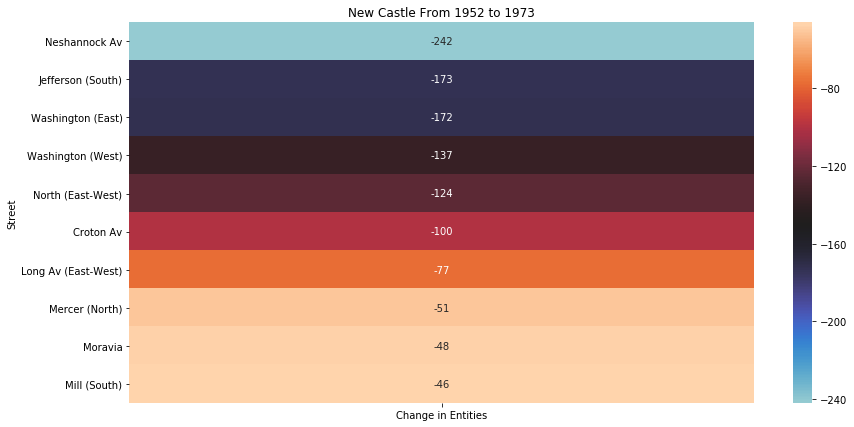

In [28]:
#GOAL: Define heatmap function that can partition a dataset given ranges of rows

#Heat Map - Organized from Most affected to least affected

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff = pd.read_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_Diff.csv')
#display(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff.head())

def partitionHeatMaps(data, select_index, size, title, xlabel, interval):
    """
    Summary
    ----------
    Produces multiple heat maps based on the 'interval' provided

    Extended description
    ----------
    Creates a heat map for each consecutive pair in the 'interval' list along with providing a title for each heat map
        
    Parameters
    ----------
    data :
    select_index :
    size :
    title :
    xlabel : column that is 
    interval : list
        list of integers
        Ex. [100, 200, 400] -> data[100:200], data[200:400]
        
    Returns
    -------
    DataFrame
        columns : 'Street', 'Change in Entities'
        data types :   str, int
    """
    
    d = data.set_index(select_index)
    
    for i in range(len(interval) - 1): #creates a heatmap for each partition that it was given
        plt.figure(figsize=(size[0], size[1]))
        plt.title(title)
        df = d.iloc[interval[i]:interval[i+1]]
        sns.heatmap(data=df, annot=True, fmt='d', center=-150)
        
partitionHeatMaps(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_diff, 'Street', (14,7), "New Castle From 1952 to 1973", "Change in Entities", [0, 10])

print("Task #10 complete")


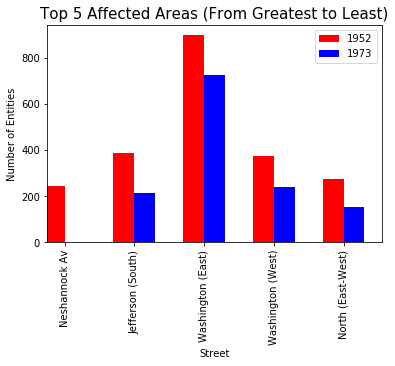

Task #10 complete


In [29]:
#GOAL: display side-by-side bar charts showing the change between 1952 and 1973 of the top 5 affected streets

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952 = pd.read_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1952.csv')
new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973 = pd.read_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_1973.csv')

temp52 = new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1952.rename(columns={"Number of Entities": "Number of Entities in 1952"}, inplace=False)
temp73 = new_castle_east_west_combined_washington_split_no_duplicates_unchanged_1973.rename(columns={"Number of Entities": "Number of Entities in 1973"}, inplace=False)

#Useful table for comparing 1973 to 1952
new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined = temp52.merge(temp73, on='Street')

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined.rename(
    columns={'Year_x':'Year_1', 'Number of Vacant_x': 'Number of Vacant in 1952', 'Type_x':'Type in 1952',
             'Year_y':'Year_2', 'Number of Vacant_y': 'Number of Vacant in 1973', 'Type_y':'Type in 1973'}, inplace=True)

new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined.drop(columns=['Year_1', 'Year_2'], inplace=True)
#display(new_castle_east_west_combined_washington_split_no_duplicates_unchanged_combined.head())
new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined.to_csv('New_Castle_East_West_Combined_Washington_Split_No_Duplicates_Unchanged_Joined.csv', index=False )



#Create side-by-side bar chart
#columns: Street, 1952, 1973

TOP_FIVE = ['Neshannock Av', 'Jefferson (South)', 'Washington (East)', 'Washington (West)', 'North (East-West)']

#top 5: Neshannock Av, Jefferson (South), Washington (East), Washington (West), North (East-West)
#df = unchangedStreets_indexChanged_WashingtonSplit.iloc[[308, 221, 448, 449, 100]] 
df = new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined.loc[new_castle_east_west_combined_washington_split_no_duplicates_unchanged_joined['Street'].isin(TOP_FIVE)]
df.set_index('Street', inplace=True)
df = df.loc[['Neshannock Av', 'Jefferson (South)', 'Washington (East)', 'Washington (West)', 'North (East-West)']] #reorganize from most affected to least (instead of alphabetically)


def side_by_side_bar_chart(data, columns, y_label, title, legend, width=0.3, fontsize=15):
    fig = plt.figure() # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    ax.set_title(title, fontsize=fontsize)
    width = width
    data[columns[0]].plot(kind='bar', color='red', ax=ax, width=width, position=1)
    data[columns[1]].plot(kind='bar', color='blue', ax=ax, width=width, position=0)
    ax.set_ylabel(y_label)
    plt.legend(legend)
    plt.show()
    
side_by_side_bar_chart(data=df, columns=['Number of Entities in 1952', 'Number of Entities in 1973'],
                       y_label='Number of Entities', title='Top 5 Affected Areas (From Greatest to Least)', legend=['1952', '1973'])


print("Task #11 complete")